Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
Now Find the number of posts these handles have done in the previous 3 days.
Depict this information using a suitable graph.


In [1]:
#importing relevant libraries
from selenium import webdriver
import time
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import re
import pandas as pd

In [2]:
#opening chromedriver  
driver = webdriver.Chrome("C:\\chromedriver.exe")

#maximize the window
driver.maximize_window()

In [3]:
def insta_openLoginPage():
    """
        Objective:
            This function is used to open the instagram login page.
        Input:
            None
        Output:
            IG login page opens up.
    """
    #sign up page opens up
    driver.get("https://www.instagram.com/")
    
    #wait until login link visible
    wait=WebDriverWait(driver,10) 
    login= wait.until(EC.visibility_of_element_located((By.CLASS_NAME,'izU2O')))
    
    #path for login page is extracted
    x=login.get_attribute('innerHTML').split('\"')
    path='https://www.instagram.com'+x[1]
    driver.get(path)
    
def dismis_notification():
    """
        Objective:
            This function is used to dismiss if notification box pops up .
        Input:
            None
        Output:
            notification box is dismissed.
    """
    try:
        #wait until notification box is located
        wait=WebDriverWait(driver,10) 
        notif_box= wait.until(EC.presence_of_element_located((By.XPATH,'//div[(@class="mt3GC")]/button[2]')))
        notif_box.click()
    except TimeoutException:
        pass
    
def insta_login(enter_username,enter_password):
    """
        Objective:
            This function is used for instagram login.
        Input:
            enter_username:string
            enter_password:string
        Output:
            IG User is logged in.
    """
    insta_openLoginPage()
    
    #enter username
    #wait until unsername text box is located
    wait=WebDriverWait(driver,10) 
    username= wait.until(EC.visibility_of_element_located((By.NAME,"username")))
    username.send_keys(enter_username)
    
    #enter password
    password=driver.find_element_by_name("password")
    password.send_keys(enter_password)
    
    #click on submit
    submit=driver.find_element_by_xpath('//button[(@type="submit")]')
    submit.click()
    
    #if notification box pops up 
    dismis_notification()

In [4]:
#username=input('Enter Login ID: ')
#password=input('Enter Login PASSWORD: ')

username='Sample_Username'
password='Sample_password'
insta_login(username,password)

In [5]:
def insta_search(search_item):
    """
        Objective:
            This function is used for searching search_item using search bar.
        Input:
            search_item:string
        Output:
            IG User gets list of items options displayed on screen after searching search_item.
    """
    #if valid username or id is entered
    try:
        search=driver.find_element_by_xpath('//input[(@placeholder="Search")]')
        search.get_attribute('outerHTML')
        search.send_keys(search_item)
        search.send_keys(Keys.ENTER)
        
    #if invalid username or id is entered
    except NoSuchElementException:
        username=input('Enter Login ID: ')
        password=input('Enter Login PASSWORD: ')
        insta_login(username,password)        
        printName_IGHandles('food')
        
def clear_search_bar():
    """
        Objective:
            This function is used for clearing search bar.
        Input:
            none
        Output:
            search tab is cleared.
    """
    #wait until searh bar is located
    wait=WebDriverWait(driver,10) 
    cross= wait.until(EC.presence_of_element_located((By.XPATH,'//div[(@class="aIYm8 coreSpriteSearchClear")]')))
    cross.get_attribute('outerHTML')
    cross.click()
    
def Name_IGHandles(search_item):
    """
        Objective:
            This function is used for creating a list of IG Handle names after searching search_item.
        Input:
            search_item:string
        Output:
            Returns the list of IG Handle names(excludings hashtags).
    """
    insta_search(search_item)
    #wait until list generated after search
    wait=WebDriverWait(driver,20) 
    lst_search= wait.until(EC.presence_of_element_located((By.XPATH,'//div[(@class="fuqBx")]')))
    
    #extracting list generated after search                 
    lst_search=lst_search.find_elements_by_css_selector('a')
    
    #extracting IG handles(accounts) excluding location and tags
    IGHandle_Name=[]
    for i in lst_search:
        url=i.get_attribute('href')
        if '/explore/' not in url:
            IGHandle_Name.append(url.split('/')[3])
            
    #clear search bar
    clear_search_bar()
    
    #return IGHandle Name
    return IGHandle_Name

def insta_openProfile(open_item):
    """
        Objective:
            This function is used for opening the profile of open_item.
        Input:
            open_item:sting
        Output:
            open_item profile opens up.
    """    
    #creating base url
    base_url='https://www.instagram.com/'
    url=base_url+open_item
    #url will open in driver
    driver.get(url)
                
def open_1_10_Handles(search_item):
    """
        Objective:
            This function is used for creating a dictionary of IG first 10 Handles with username as key and no. of followers(str) as value after searching search_item.
        Input:
            search_item:string
        Output:
            Returns the dictionary of IG first 10 Handles.
    """
    IGHandle_Name=Name_IGHandles(search_item)
    #Dict d is created with username as key and no. of followers(str) as value
    d={}
    #print(IGHandle_Name)
    for i in IGHandle_Name[:10]:
        insta_openProfile(i)
        key=i
        #wait until visibility of no. of followers is located
        wait=WebDriverWait(driver,10) 
        followers= wait.until(EC.visibility_of_element_located((By.XPATH,'//ul[(@class="k9GMp ")]/li[2]//span[@class="g47SY "]')))
        #exctract the count of no. of followers
        value=followers.get_attribute('innerHTML')
        #Dict d is updated
        d[key]=d.get(key,'')+value
    return d

def find_int_from_string(x):
    """
        Objective:
            This function is used for coverting string to integer value.
        Input:
            x:string
        Output:
            Returns the int value x.
    """
    if 'k' in x:
        y=x.split('k')[0]
        x=float(y)*1000
    elif 'm' in x:
        y=x.split('m')[0]
        x=float(y)*1000000
    elif ',' in x:
        x=x.replace(',','')
        x=float(x)
    else:
        x=float(x)
    return int(x)
    
def top_5Handles(search_item):
    """
        Objective:
            This function is used for creating a dictionary of IG top 5 Handles with username as key and no. of followers(int) as value after searching search_item.
        Input:
            search_item:string
        Output:
            Returns the dictionary of IG top 5 Handles.
    """
    d=open_1_10_Handles(search_item)
    for i in d:
        #no. of followers in string is converted to int
        d[i]=find_int_from_string(d[i])
    #sort dict d by value in descending order
    sorted_d=[(i,d[i]) for i in sorted(d,key=d.get,reverse=True)]
    return sorted_d[:5]

def plot_bar_graph(dct,xlabel,ylabel):
    """
        Objective:
            This function is used for pie chart for given dictionary.
        Input:
            top5:dictionary
            xlabel:str
            ylabel:str
        Output:
            plots the bar graoh of given dictionary.
    """
    #plot bar graph with width,color and edgecolor
    plt.bar(list(dct.keys()),list(dct.values()),width=0.5,color=['red','blue','green','orange','purple'],edgecolor='black')
    #print x label
    plt.xlabel(xlabel)
    #print y label
    plt.ylabel(ylabel)
    #angle of text at x axis is rotated by 45 degree
    plt.xticks(list(dct.keys()),rotation=45)
    #show plot
    plt.show()

def click_close_post():
    """
        Objective:
            This function is used for closing current post.
        Input:
            None
        Output:
            current post is closed.
    """
    driver.find_element_by_class_name("ckWGn").click()
    
def no_of_posts_top_5Handles(top5):
    """
        Objective:
            This function is used for creating a dictionary of IG top 5 Handles with username as key and no. of posts for previous 3 days(int) as value after searching search_item.
            Also,plotting a bar graph of extracted information.
        Input:
            top5:dictionary
        Output:
            Plot the bar graph of extracted data in dictionary of IG top 5 Handles and prints the same.
    """
    dct={}
    for i in top5:
        insta_openProfile(i[0])
        try:
            #click to first post
            first = driver.find_element_by_class_name('v1Nh3').click()
            #wait until tim tag is located to exctract the time of post posted.
            wait=WebDriverWait(driver,30) 
            Insta_time= wait.until(EC.visibility_of_element_located((By.XPATH,'//a[(@class="c-Yi7")]/time')))
        #case when no post is posted
        except NoSuchElementException:
            continue
            
        c=0
        while True:
            driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
            c+=1
            wait=WebDriverWait(driver,30) 
            Insta_time= wait.until(EC.visibility_of_element_located((By.XPATH,'//a[(@class="c-Yi7")]/time')))
            Insta_time=Insta_time.text
            #checking for time of post posted to exit from the loop or extract the information from it
            if ('DAY'in Insta_time) or ('DAYS' in Insta_time):
                Insta_time=int(float(Insta_time.split()[0]))
            elif ("HOURS" in Insta_time) or ("HOUR" in Insta_time) or ('MINUTE'in Insta_time)or ("MINUTES" in Insta_time):
                continue
            else:
                break
            if Insta_time >3:
                break
                
        #driver.get('https://www.instagram.com')
        dct[i[0]]=dct.get(i[0],0)+c
        click_close_post()
    #plot bar graph with x axis as IG_Handles and y axis as No.of Posts
    plot_bar_graph(dct,'IG_Handles','No.of Posts')
    
    #print the dict dct with key and its value
    for i in dct:
        print(i,dct[i])

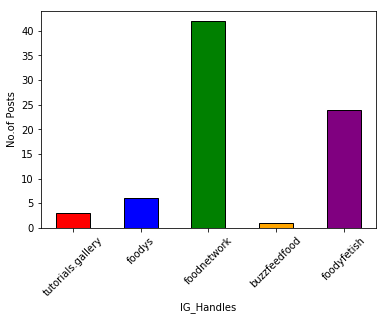

tutorials.gallery 3
foodys 6
foodnetwork 42
buzzfeedfood 1
foodyfetish 24


In [6]:
top5=top_5Handles('food')#top5 is found here
no_of_posts_top_5Handles(top5)

Your friend also needs a list of hashtags that he should use in his posts.
Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
Create a csv file with two columns : the word and its frequency
Now, find the hashtags that were most popular among these bloggers
Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.


In [7]:
def list_captions(top5):
    """
        Objective:
            This function is used to extract the list of content of the first 10 posts of top 5 IG handle.
        Input:
            top5:dictionary
        Output:
            returns the list of string of scraped content.
    """
    string=[]
    for i in top5:
        insta_openProfile(i[0])
        #click on first post
        first = driver.find_element_by_class_name('v1Nh3').click()
        c=1
        while c<=10: 
            try:
                #wait until caption is visible
                wait=WebDriverWait(driver,30) 
                temp= wait.until(EC.visibility_of_element_located((By.XPATH,'//div[(@class="C4VMK")]/span')))
                #exctract the content from post
                x=temp.get_attribute('outerHTML')
                html=bs(x,'html.parser')
                text=html.get_text()
            #case in which no caption is posted
            except TimeoutException:
                text=''                
            
            string.append(text)
            #wait until right arrow is visible and click
            wait=WebDriverWait(driver,30) 
            right_arrow= wait.until(EC.visibility_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
            right_arrow.click()
            c+=1
        #close current post
        click_close_post()
        #driver.get('https://www.instagram.com')
    return string

def dict_words(top5,string):
    """
        Objective:
            This function is used for creating dictionary of words present in list of strings.
        Input:
            top5:dictionary
        Output:
            returns the dict of words as key and its frequency as value.
    """
    words={}
    for i in string:
        #find all the words present in list of strings 
        x=re.findall(r'\w+',i)
        for key in x:
            #if its a word not a letter
            if len(key)>2:
                #dict word is updated
                words[key]= words.get(key,0)+1 
    return words

def dict_hashtags(top5,string):
    """
        Objective:
            This function is used for creating dictionary of hashtags present in list of strings.
        Input:
            top5:dictionary
        Output:
            returns the dict of hashtags as key and its frequency as value.
    """
    hashtag={}
    for i in string:
        #find all the words having # as a prefix present in list of strings 
        x=re.findall(r'#\w+',i)
        for j in x:
            #remove '#' from extracted string 
            key=j.strip('#')
            #dict hashttag is updated
            hashtag[key]= hashtag.get(key,0)+1 
    return hashtag

def create_df_words(top5,string):
    """
        Objective:
            This function is used for creating dataframe of words of dictionary dict_words.
        Input:
            top5:dictionary
        Output:
            saves the dataframe of words and its frequency in columns.
    """
    words=dict_words(top5,string)
    #creation a dict x_word with words and frequency as keys and exctracted the value in form of list from words
    x_word={'words':list(words.keys()),'frequency':list(words.values()),}
    #dataframe from dict x_word is created with columns as words and frequency
    df=pd.DataFrame.from_dict(x_word)
    #df=df.sort_values(by='frequency',ascending=False)
    #df is stored in 'words_freq.csv' csv file
    df.to_csv('words_freq.csv')

def create_df_hashtags(top5,string,hashtag):
    """
        Objective:
            This function is used for creating dataframe of hashtags of dictionary dict_hashtags.
        Input:
            top5:dictionary
        Output:
            returns the dataframe of hashtags as index and its frequency in column.
    """
    #dataframe from dict hashtag is created with index having hashtags and a column frequency
    df=pd.DataFrame.from_dict(hashtag,orient='index',columns=['frequency'])
    return df

def plot_pie_chart(top5_hashtags,title):
    """
        Objective:
            This function is used for pie chart for given data frame.
        Input:
            top5:dataframe
            title:str
        Output:
            plots the pie chart of given Dataframe.
    """
    #labels are extracted from indexes in df top5_hashtags
    labels=top5_hashtags.index.tolist()
    #sizes are extracted from collumn frequency in df top5_hashtags
    sizes=top5_hashtags.frequency.tolist()
    #print title
    plt.title(title)
    #pie chart is plotted with labels and precentage upto 1 decimal place
    plt.pie(sizes,labels=labels,autopct="%.1f%%")
    #pie chart in form circle
    plt.axis("equal")
    #show plot
    plt.show()
    
def sort_plot_hashtags(top5):
    """
        Objective:
            This function is used for sorting and plotting top of hashtags used by top 5 IG handles.
        Input:
            top5:dictionary
        Output:
            plots the pie chart and print of the top 5 hashtags with its count.
    """
    #strings with content of caption is scraped
    string=list_captions(top5)
    #df of words and its frequency saved in csv filed
    create_df_words(top5,string)
    
    """sorted_hashtag=[(i,hashtag[i]) for i in sorted(hashtag,key=hashtag.get,reverse=True)]
    top5_hashtags=sorted_hashtag[:5]
    labels=[]
    sizes=[]
    for i in top5:
        labels.append(i[0])"""
    
    #dict of hashtags is created
    hashtag=dict_hashtags(top5,string)
    #df of hashtags is created
    df=create_df_hashtags(top5,string,hashtag)
    #sort df wrt frequency
    sorted_hashtag=df.sort_values(by='frequency',ascending=False)
    #extract top 5 hashtags from dataframe sorted_hashtag
    top5_hashtags=sorted_hashtag[:5]
    
    #pie chart is plotted with title Top 5 hashtags
    plot_pie_chart(top5_hashtags,"Top 5 hashtags")
    
    #df of top5_hashtags is printed
    print(top5_hashtags)

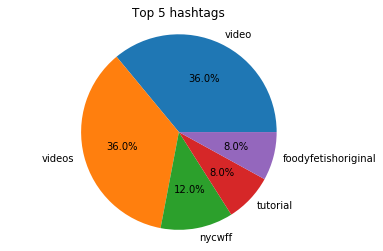

                     frequency
video                        9
videos                       9
nycwff                       3
tutorial                     2
foodyfetishoriginal          2


In [8]:
sort_plot_hashtags(top5)

You need to also calculate average followers : likes ratio for the obtained handles. 
Followers : Likes ratio is calculated as follows:
Find out the likes of the top 10 posts of the 5 handles obtained earlier.
Calculate the average likes for a handle.
Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
Create a bar graph to depict the above obtained information.

In [9]:
def Average_likes(list_likes):
    """
        Objective:
            This function is used for finding the average likes.
        Input:
            list_likes:list of integer values
        Output:
            returns float value.
    """
    return sum(list_likes)/10

def dict_likes_top5_IGhandles(top5):
    """
        Objective:
            This function is used for creating dictionary of key as IG handle name and its likes counts as value.
        Input:
            top5:dictionary
        Output:
            returns the dictionary of key as IG handle name and its likes counts as value.
    """
    dct={}
    for i in top5:
        insta_openProfile(i[0])
        #first post opens up
        first = driver.find_element_by_class_name('v1Nh3').click()
        time.sleep(3)
        c=1
        list_likes=[]
        while c<=10:
            like=''
            #wait until view button(video) and click button(pics) is visible
            wait=WebDriverWait(driver,30) 
            x= wait.until(EC.visibility_of_element_located((By.XPATH,'//section[(@class="EDfFK ygqzn")]/div')))
            if 'views' in x.get_attribute('innerHTML'):
                x=driver.find_element_by_xpath('//section[(@class="EDfFK ygqzn")]/div/span')
                x.click()
                x=driver.find_element_by_xpath('//div[(@class="vJRqr")]/span')
                like+=x.get_attribute('innerHTML')
                driver.find_element_by_xpath('//div[(@class="QhbhU")]').click()
            else:
                x=driver.find_element_by_xpath('//section[(@class="EDfFK ygqzn")]/div/div/button/span')
                like+=x.get_attribute('innerHTML')
            #replace ','with '' in like 
            if ',' in like:
                like=like.replace(',','')
            #append to list_likes by converting str to float value
            list_likes.append(float(like))
            #click to right arrow for next pic
            driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
            c+=1
        #find the average likes            
        Avg_likes=Average_likes(list_likes)
        #close current post
        click_close_post()
        #driver.get('https://www.instagram.com')
        #update dict dct with avg likes
        dct[i[0]]=dct.get(i[0],0)+(Avg_likes)
    return dct

def dict_followers_top5_IGhandles(top5):
    """
        Objective:
            This function is used for creating dictionary of key as IG handle name and its followers counts as value.
        Input:
            top5:dictionary
        Output:
            returns the dictionary of key as IG handle name and its followers counts as value.
    """
    d={}
    for i in top5:
        key=i[0]
        value=i[1]
        d[key]=d.get(key,0)+value
    return d
    
def plot_ratio_dict(top5):
    """
        Objective:
            This function is used for plotting bar graph and updating a dictionary with key as IG handle name and Followers:Likes ratio as value.
        Input:
            top5:dictionary
        Output:
            plots the bar graph of updateddictionary with key as IG handle name and Followers:Likes ratio as value and prints the same.
    """
    dct=dict_likes_top5_IGhandles(top5)
    d=dict_followers_top5_IGhandles(top5)
    #dict dct is updated with ratio of followers:likes
    for i in dct: 
        dct[i]=d[i]/dct[i]
    #plot bar graph with x axis as IG_Handles and y axis as Ratio
    plot_bar_graph(dct,'IG_Handles','Ratio')
    
    #print dict dct with key and its value
    for i in dct:
        print(i,dct[i])

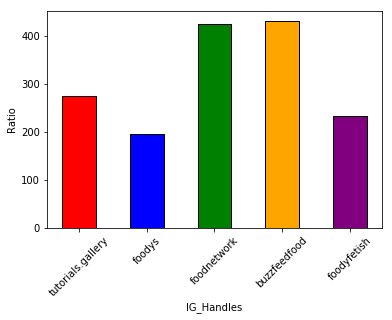

tutorials.gallery 275.244103347129
foodys 196.29809551191173
foodnetwork 425.3547639733565
buzzfeedfood 431.0882709957005
foodyfetish 232.53428170844305


In [10]:
plot_ratio_dict(top5)

In [11]:
#closing chromedriver
driver.close()